# Brainster Academy Final Project
### Team 3: Tatjana Veljkovic, Ilija Todorov, Ivana Tomovska Efremov

### Part Three

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import string
import nltk
nltk.download('punkt')
import re
from string import punctuation
from nltk.tokenize import WordPunctTokenizer, PunktSentenceTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import tqdm
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

from statistics import mean

from scipy import spatial
from ast import literal_eval

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
#!pip install pillow

In [4]:
#!pip install wordcloud

### Read data - 2011-2015

In [5]:
List_of_all_files = ['PartTwo_2011','PartTwo_2012','PartTwo_2013','PartTwo_2014','PartTwo_2015']

In [6]:
Working_file = List_of_all_files[0] #Chose file for working
print(Working_file)

PartTwo_2011


### Read year 2011

In [7]:
tweets_clustered = pd.read_csv(Working_file + '.csv')

In [8]:
tweets_clustered.head(20)

,source,year,Tweets_cleaned,Cluster_labels,month,day_of_week,vectors
0,goodhealth,2011,wheat watchglutenfree beer really safe celiac,0,12,5,"[0.05957401543855667, -0.40907374024391174, 0...."
1,goodhealth,2011,mood casserole tonite lowcal lowfat,0,12,5,"[-0.05187521502375603, -0.30507344007492065, 0..."
2,goodhealth,2011,go tonight easy getgorgeous makeup tip,0,12,5,"[-0.021747156977653503, -0.3229683041572571, 0..."
3,goodhealth,2011,ready start think lose weight,0,12,3,"[0.05787888541817665, -0.369914710521698, 0.60..."
4,goodhealth,2011,eye year eve pretty party dress,0,12,3,"[-0.10775771737098694, -0.11672255396842957, 0..."
5,goodhealth,2011,dangerous must avoid,0,12,3,"[0.08674143999814987, -0.5083619356155396, 0.5..."
6,goodhealth,2011,recipeoftheday zucchini oven chip much healthi...,0,12,2,"[-0.07388593256473541, -0.3110058307647705, 0...."
7,goodhealth,2011,lose pound send info weightlosshealthyahoocom,0,12,2,"[-0.2577492296695709, -0.29290807247161865, 0...."
8,goodhealth,2011,resolution,0,12,2,"[-0.04465227574110031, -0.301419734954834, 0.5..."
9,goodhealth,2011,recipeoftheday whats dinner tonight,0,12,1,"[-0.058684092015028, -0.10617541521787643, 0.4..."


In [9]:
tweets_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303 entries, 0 to 2302
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   source          2303 non-null   object
 1   year            2303 non-null   int64 
 2   Tweets_cleaned  2302 non-null   object
 3   Cluster_labels  2303 non-null   int64 
 4   month           2303 non-null   int64 
 5   day_of_week     2303 non-null   int64 
 6   vectors         2303 non-null   object
dtypes: int64(4), object(3)
memory usage: 126.1+ KB


In [10]:
tweets_clustered['year'].value_counts().sort_index()

2011    2303
Name: year, dtype: int64

### Deleting NaN rows

In [11]:
tweets_clustered.shape

(2303, 7)

In [12]:
tweets_clustered['Tweets_cleaned'].isna().sum()

1

In [13]:
tweets_clustered.loc[tweets_clustered['Tweets_cleaned'].isna()]

,source,year,Tweets_cleaned,Cluster_labels,month,day_of_week,vectors
396,goodhealth,2011,NaN,0,9,0,"[-0.076924629509449, -0.08162134140729904, 0.2..."


In [14]:
tweets_clustered.dropna(subset=['Tweets_cleaned'], inplace=True)

In [15]:
tweets_clustered.shape

(2302, 7)

In [16]:
clusters = tweets_clustered['Cluster_labels'].value_counts()

# General info

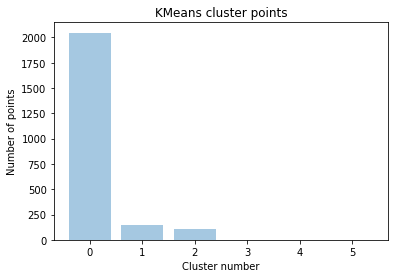

In [17]:
plt.bar([x for x in range(len(clusters))], tweets_clustered.groupby(['Cluster_labels'])['source'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [18]:
twitter_weekdays = tweets_clustered['day_of_week'].value_counts()
df_weekdays = pd.DataFrame(data=twitter_weekdays)
df_weekdays['Weekday'] = df_weekdays.index
df_weekdays.sort_values('Weekday')

,day_of_week,Weekday
0,359,0
1,496,1
2,476,2
3,427,3
4,435,4
5,61,5
6,48,6


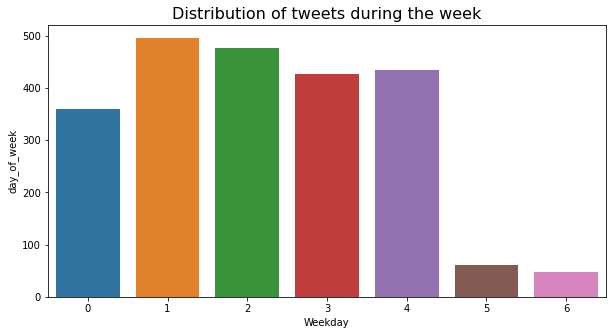

In [19]:
plt.figure(figsize = (10,5))
sns.barplot(y ='day_of_week', x = 'Weekday', data = df_weekdays)
plt.title('Distribution of tweets during the week', fontsize=16)
plt.show()

### Note: Most of the tweets are released during workdays (3 to 4 times more on workdays than during weekend days)

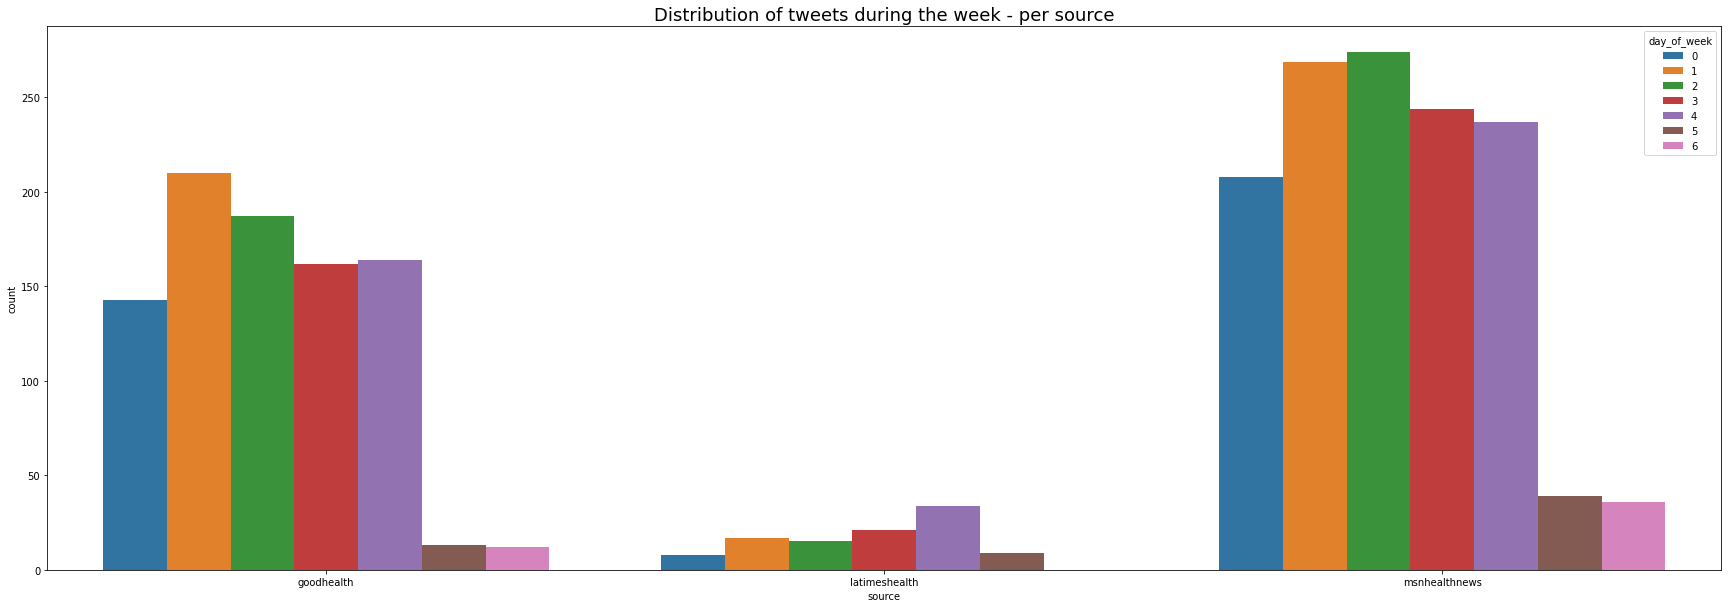

In [20]:
plt.figure(figsize = (30,10))
sns.countplot(x ='source', hue = "day_of_week", data = tweets_clustered)
plt.title('Distribution of tweets during the week - per source', fontsize=18)
plt.show()

### Note: Uneven distribution od tweets among sources, same pattern of tweets during days of the week

In [21]:
tweets_breakdown = tweets_clustered.groupby(['source', 'month']).count()
#tweets_breakdown[:50]

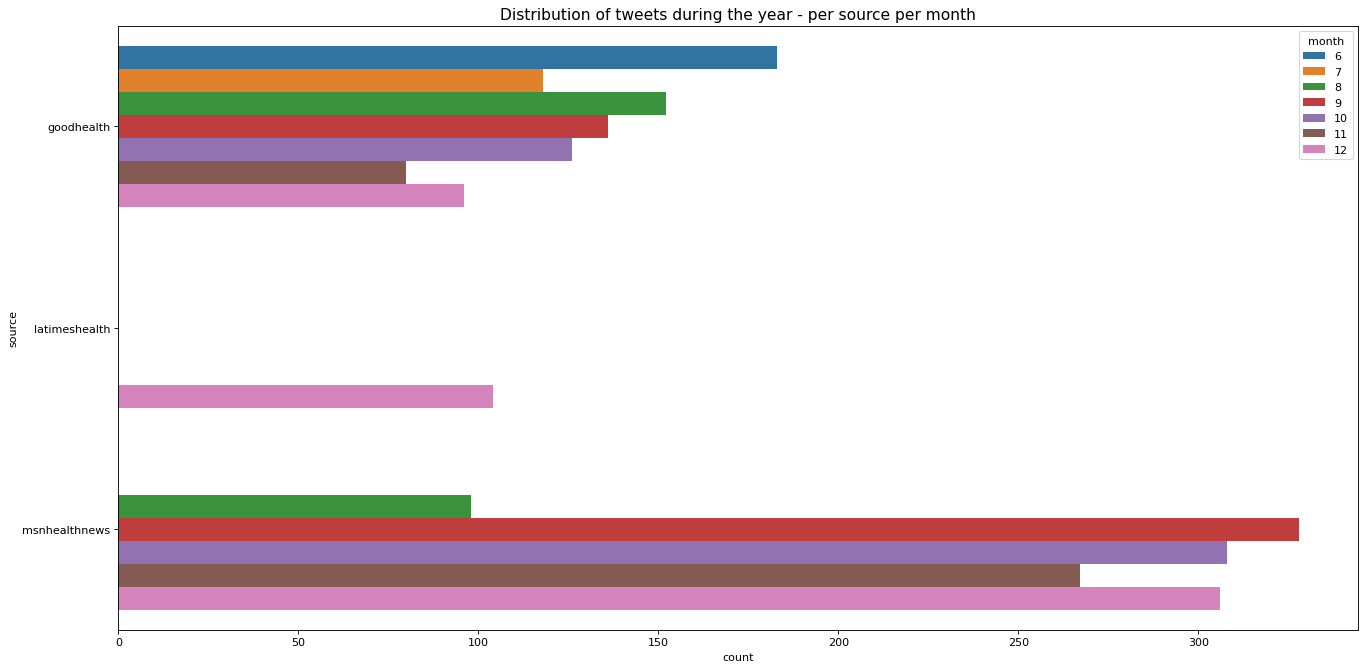

In [22]:
plt.figure(figsize=(20,10),dpi=80)
sns.countplot(data=tweets_clustered, y="source", hue="month")
plt.title('Distribution of tweets during the year - per source per month', fontsize=14)
plt.show()

# Word cloud per source

In [23]:
source = tweets_clustered['source'].unique().tolist()
#source

In [24]:
source_list_toshow = []

source_list = tweets_clustered['source'].unique().tolist()

for i in source_list:
    source_individual = tweets_clustered[tweets_clustered['source'] == i]
    text_source_individual = " ".join(cat for cat in source_individual.Tweets_cleaned)
    #mask = np.array(Image.open("twitter-2012-negative-logo-5C6C1F1521-seeklogo.com.png"))
    
    
    word_cloud_source = WordCloud(
    width=5000,
    height=3000,
    random_state=1,
    #mask=mask,
    background_color="white",
    colormap="winter",
    collocations=False,
    stopwords=STOPWORDS,
    ).generate(text_source_individual)
    
    source_list_toshow.append(word_cloud_source)

In [25]:
#source 

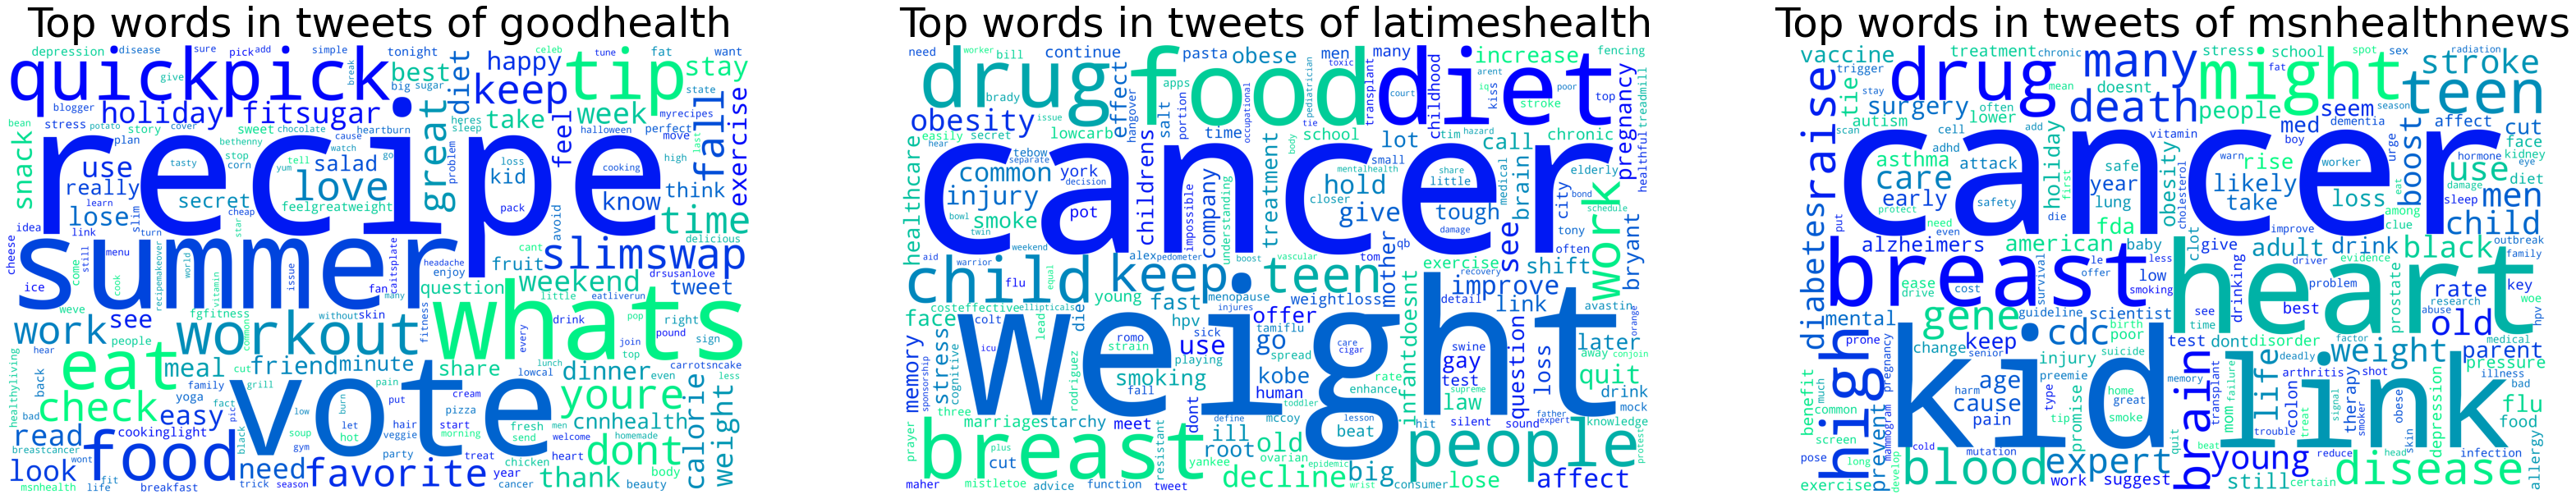

In [26]:
fig = plt.figure(figsize=(75,75))
count = 1

for i in range(len(source)):
    ax=fig.add_subplot(4,4, count)
    ax.imshow(source_list_toshow[i])
    plt.title((f'Top words in tweets of {source[i]}'), size=50)
    ax.axis("off")
    count += 1
plt.show()